#### 1d diffraction from a 2-d aperture

/Applications/anaconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Applications/anaconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Applications/anaconda3/lib/python3.12/site-packages/

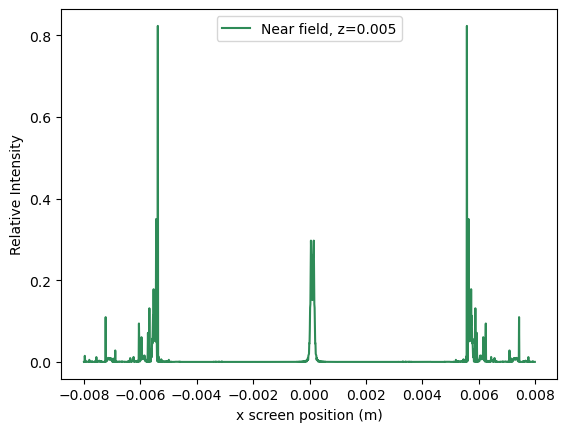

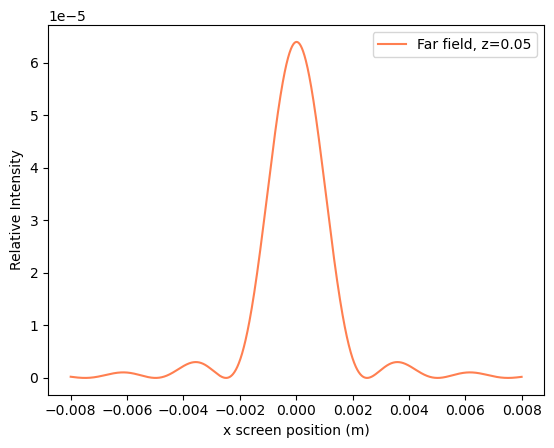

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as si

pi=math.pi

E0=1

lambda_=1e-6
k=2*pi/lambda_

y=0
#defining functions, we've had to split it into two: real and imaginary

def Fresnel2dreal(yp,xp, y,x,k,z):
    function_re=(k*E0/(2*pi*z))*math.cos((k/(2*z))*(((x-xp)**2+(y-yp)**2)))
    return function_re

def Fresnel2dimag(yp,xp, y,x,k,z):
    function_im=(k*E0/(2*pi*z))*math.sin((k/(2*z))*(((x-xp)**2+(y-yp)**2)))
    return function_im

#integration. the outer variables we want to integrate go first (x)
# note how this order is different to when we defined the function. When we define the function, inner integral variable goes first
# The inner integral gets integrated first, but the order we write it in scipy is the same as you would on paper!

points=np.arange(-8e-3,8e-3,1e-5)  #this will define the x values 

#creating a function to obtain data so we can change parameters with ease and plot multiple things at once
def plots (xp1,xp2,yp1,yp2,z):
    x_positions=[]
    intensities=[]
    for x in points:
        x_positions.append(x)
    
        realpart, realerror=si.dblquad(Fresnel2dreal,xp1,xp2,yp1,yp2, args=(y,x,k,z),epsabs=1e-10,epsrel=1e-10)
        imagpart, imagerror=si.dblquad(Fresnel2dimag,xp1,xp2,yp1,yp2, args=(y,x,k,z),epsabs=1e-10,epsrel=1e-10)
    
        intensity=(realpart**2+imagpart**2)
        intensities.append(intensity)
    results=(x_positions,intensities)
    return results

case_1=plots(0,2e-4,0,2e-4,0.005)  #nearfield
case_2=plots(0,2e-5,0,2e-5,0.05)   #farfield

plt.figure()
plt.plot(case_1[0],case_1[1], label="Near field, z=0.005",color="seagreen")
plt.xlabel("x screen position (m)")
plt.ylabel("Relative Intensity")

plt.legend()

plt.figure()
plt.plot(case_2[0],case_2[1], label ="Far field, z=0.05",color="coral")
plt.xlabel("x screen position (m)")
plt.ylabel("Relative Intensity")

plt.legend()

#### 2d diffraction from 2d rectangular aperture

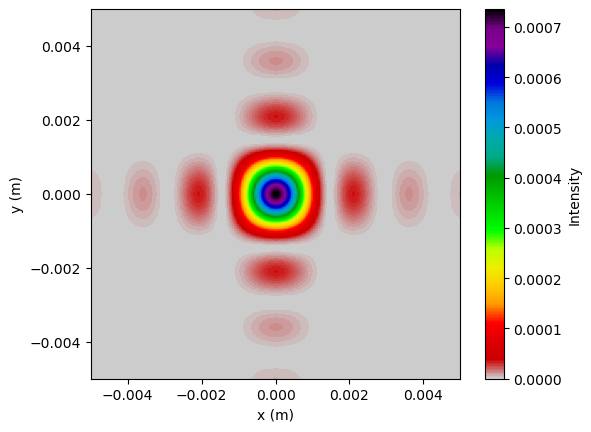

In [3]:
#Making a square aperture

x1=-0.005
x2=-x1
y1=x1
y2=x2

xp1=-2e-5
xp2=2e-5
yp1=-2e-5
yp2=2e-5
z=0.1

lambda_=589e-9
k=2*pi/lambda_
numpoints=150

xvals=np.linspace(x1,x2,numpoints)
yvals=np.linspace(y1,y2,numpoints)
intensities=np.zeros((numpoints,numpoints))

for i, x in enumerate(xvals):
    for j, y in enumerate(yvals):
        realpart, realerror=si.dblquad(Fresnel2dreal,xp1,xp2,yp1,yp2, args=(y,x,k,z),epsabs=1e-10,epsrel=1e-10)
        imagpart, imagerror=si.dblquad(Fresnel2dimag,xp1,xp2,yp1,yp2, args=(y,x,k,z),epsabs=1e-10,epsrel=1e-10)
        intensities[j,i]=(realpart**2+imagpart**2)

plt.imshow(intensities,vmin=0.0,vmax=1.0*intensities.max(),extent=(x1,x2,y1,y2),origin="lower",cmap="nipy_spectral_r")
plt.colorbar(label="Intensity")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

#### 2d diffraction from a 2d circular aperture

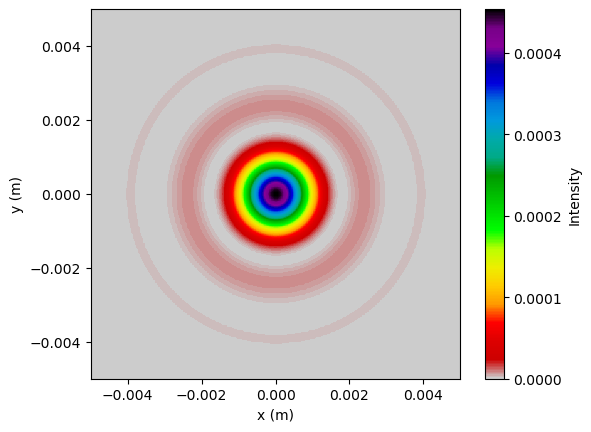

In [4]:
#making a circular aperture

x1=-0.005
x2=-x1
y1=x1
y2=x2


R=2e-5

xp1=-R
xp2=R

#our integration limits for y can be functions!
def yp1func(xp):
    yp1=-np.sqrt(R**2-xp**2)
    return yp1

def yp2func(xp):
    yp2=np.sqrt(R**2-xp**2)
    return yp2

z=0.1

lambda_=589e-9
k=2*pi/lambda_
numpoints=150

xvals=np.linspace(x1,x2,numpoints)
yvals=np.linspace(y1,y2,numpoints)
intensities_circ=np.zeros((numpoints,numpoints))

for i, x in enumerate(xvals):
    for j, y in enumerate(yvals):
        realpart, realerror=si.dblquad(Fresnel2dreal,xp1,xp2,yp1func,yp2func, args=(y,x,k,z),epsabs=1e-10,epsrel=1e-10)
        imagpart, imagerror=si.dblquad(Fresnel2dimag,xp1,xp2,yp1func,yp2func, args=(y,x,k,z),epsabs=1e-10,epsrel=1e-10)
        intensities_circ[j,i]=(realpart**2+imagpart**2)


plt.imshow(intensities_circ,vmin=0.0,vmax=1.0*intensities_circ.max(),extent=(x1,x2,y1,y2),origin="lower",cmap="nipy_spectral_r")
plt.colorbar(label="Intensity")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

#### Monte carlo for circular aperture

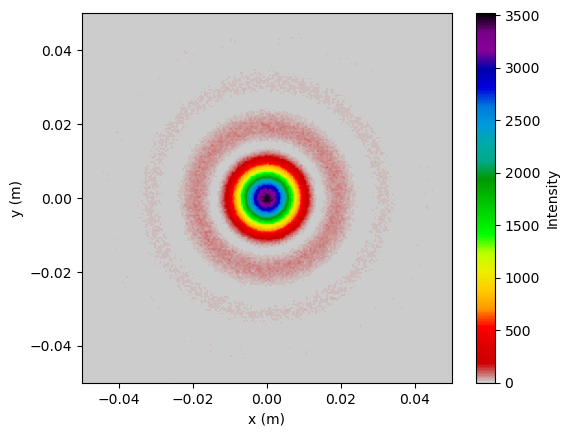

In [34]:
N_samples=4000  #number of samples to be used for each point on screen

numpoints=200

x1=-0.05
x2=-x1
y1=x1
y2=x2

x_values=np.linspace(x1,x2,numpoints)
y_values=np.linspace(y1,y2,numpoints)

R=2e-5
z=0.8

#these would be the integration limits
xp1=-R
xp2=R
yp1=-R
yp2=R

area=np.pi*R**2   #defining the area for integration (will get used to compute integral later)

intensity_array=np.zeros((numpoints,numpoints))    #square array to store intensity values


for i,x in enumerate(x_values):
    for j,y in enumerate(y_values):    #we loop over all x values and all y values, we want to work on EACH point

        xp_values=np.random.uniform(xp1,xp2,N_samples)       #each point has N_samples values associated to it
        yp_values=np.random.uniform(yp1,yp2,N_samples)        #but some of these points are outside the circle
        all_intensities=[]
        
        real_all=[]
        im_all=[]

        for p,q in zip(xp_values,yp_values):             #filtering the values out 
            rp=np.sqrt(p**2+q**2)
            if rp<=R:
                re=Fresnel2dreal(q,p,y,x,k,z)
                im=Fresnel2dimag(q,p,y,x,k,z)
            elif rp>R:
                re=0
                im=0
            real_all.append(re)
            im_all.append(im)
        real_all_avg=np.mean(real_all)
        im_all_avg=np.mean(im_all)

        intensity=area*(real_all_avg**2+im_all_avg**2)
        intensity_array[i,j]=intensity

plt.imshow(intensity_array,vmin=0.0,vmax=1.0*intensity_array.max(),extent=(x1,x2,y1,y2),origin="lower",cmap="nipy_spectral_r")
plt.colorbar(label="Intensity")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()